In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(777)
 
t = np.arange(10)
 
x_0 = t + 2+ np.random.randn(10)
x_1 = 2*t + 2+ np.random.randn(10)
x_2 = -2*t + 10 + np.random.randn(10)
X = np.vstack((x_0, x_1, x_2))
S = np.cov(X); print(S)
m = np.var(X, axis = 1); print(m)

[[ 10.71923787  18.06322696 -18.01298407]
 [ 18.06322696  36.14284874 -34.64948098]
 [-18.01298407 -34.64948098  35.10659441]]
[ 9.64731408 32.52856387 31.59593497]


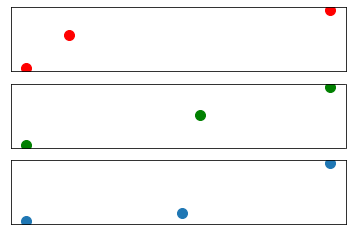

In [3]:
plt.subplot(3,1,1)
plt.scatter(X[:, 0], X[:, 1], s = 100, c = 'r')
plt.xticks([])
plt.yticks([])
plt.subplot(3,1,2)
plt.scatter(X[:, 1], X[:, 2], s = 100,c = 'g')
plt.xticks([])
plt.yticks([])
plt.subplot(3,1,3)
plt.scatter(X[:, 2], X[:, 0], s = 100)
plt.xticks([])
plt.yticks([])
plt.show()

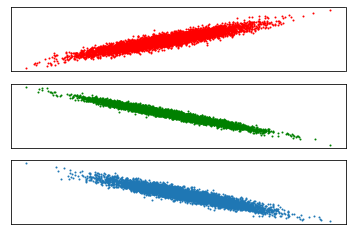

In [4]:
num_points = 6000

X = np.random.multivariate_normal(m, S, num_points)
plt.subplot(3,1,1)
plt.scatter(X[:, 0], X[:, 1], s = 1, c = 'r')
plt.xticks([])
plt.yticks([])
plt.subplot(3,1,2)
plt.scatter(X[:, 1], X[:, 2], s = 1,c = 'g')
plt.xticks([])
plt.yticks([])
plt.subplot(3,1,3)
plt.scatter(X[:, 2], X[:, 0], s = 1)
plt.xticks([])
plt.yticks([])
plt.show()

In [5]:
def remove_dots_by_rule (X):
    d = np.array([0.5,0.6,0.8]).dot(S[0][0]+S[1][1]+S[2][2]); d = d.dot(d); X1 = np.array([[0,0,0]]); X2 =  np.array([[0,0,0]]);
    epsilon = 0.5*d
    for i in range (len(X)):
        X_ =  X-m;
        if (X_[i]).dot(S.dot(X_[i].T)) >= d + epsilon: X1 = np.vstack((X1, X_[i]));
        if (X_[i]).dot(S.dot(X_[i].T)) <= d - epsilon: X2 = np.vstack((X2, X_[i]))                                                                          
    return  X1[1:,:],X2[1:,:]           

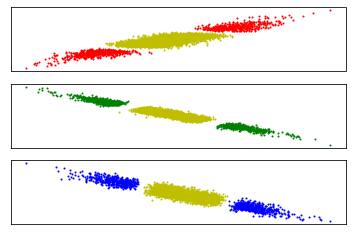

961 3465


In [6]:
X1,X2 = remove_dots_by_rule (X)


plt.subplot(3,1,1)
plt.scatter(X1[:, 0], X1[:, 1], s = 1, c = 'r');plt.scatter(X2[:, 0], X2[:, 1], s = 1, c = 'y')
plt.xticks([])
plt.yticks([])
plt.subplot(3,1,2)
plt.scatter(X1[:, 1], X1[:, 2], s = 1,c = 'g');plt.scatter(X2[:, 1], X2[:, 2], s = 1,c = 'y')
plt.xticks([])
plt.yticks([])
plt.subplot(3,1,3)
plt.scatter(X1[:, 2], X1[:, 0], s = 1, c = 'b');plt.scatter(X2[:, 2], X2[:, 0], s = 1, c = 'y')
plt.xticks([])
plt.yticks([])
plt.show()

print(len(X1),len(X2))